In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/babd13/BABD-13.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/babd13/BABD-13.csv')

In [11]:
df.shape

(544462, 151)

In [9]:
X = df.drop('label', axis=1).drop('account', axis=1).drop('SW', axis=1)
all_indices = set(range(X.shape[1]))  # Assuming X has columns ranging from 0 to X.shape[1]-1
selected_indices = set(np.r_[1:10, 20:25, 40, 54, 60:62, 91, 96, 105:107, 132:148])
dropped_indices = all_indices - selected_indices
dropped_columns = X.columns[list(dropped_indices)]
dropped_columns

Index(['PAIa11-1', 'PAIa14-R3', 'PAIa14-R4', 'PAIa15-1', 'PAIa15-2',
       'PAIa15-R1', 'PAIa15-R2', 'PAIa16-1', 'PAIa16-2', 'PAIa16-R1',
       ...
       'CI4a22-2', 'CI4a23', 'CI4a31', 'CI4a32-1', 'CI4a32-2', 'CI4a33',
       'CI4a41', 'CI4a42-1', 'CI4a42-2', 'CI4a43'],
      dtype='object', length=110)

In [9]:
for col in dropped_columns: print(col)

PAIa11-1
PAIa14-R3
PAIa14-R4
PAIa15-1
PAIa15-2
PAIa15-R1
PAIa15-R2
PAIa16-1
PAIa16-2
PAIa16-R1
PAIa16-R2
PAIa17-R3
PAIa21-1
PAIa21-2
PAIa21-3
PAIa21-4
PAIa21-R1
PAIa21-R2
PAIa21-R3
PAIa21-R4
PAIa22-1
PAIa22-2
PAIa22-R1
PAIa22-R2
PDIa1-1
PDIa1-2
PDIa1-R1
PDIa1-R2
PDIa1-R3
PDIa11-1
PDIa11-2
PDIa11-R1
PDIa11-R2
PDIa12
PDIa12-R
PDIa13
PDIa13-R
PTIa1
PTIa2
PTIa31-1
PTIa31-2
PTIa31-3
PTIa32
PTIa33
PTIa41-3
PTIa42
PTIa43
CI1a1-1
CI1a1-2
CI1a2
CI2a11-1
CI2a11-2
CI2a12-1
CI2a12-2
CI2a12-3
CI2a12-4
CI2a21-1
CI2a21-2
CI2a22-1
CI2a22-2
CI2a22-3
CI2a22-4
CI2a23-1
CI2a23-2
CI2a31-1
CI2a31-2
CI2a32-1
CI2a32-2
CI2a32-3
CI2a32-4
CI2a33-1
CI2a33-2
CI3a11-1
CI3a12-1
CI3a12-2
CI3a12-3
CI3a12-4
CI3a21-2
CI3a21-3
CI3a22-1
CI3a22-2
CI3a22-3
CI3a22-4
CI3a22-5
CI3a22-6
CI3a23-3
CI3a31-1
CI3a31-2
CI3a32-1
CI3a32-2
CI3a32-3
CI3a32-4
CI3a33-1
CI3a33-2
CI4a11
CI4a12-1
CI4a12-2
CI4a13
CI4a21
CI4a22-1
CI4a22-2
CI4a23
CI4a31
CI4a32-1
CI4a32-2
CI4a33
CI4a41
CI4a42-1
CI4a42-2
CI4a43


In [10]:
for col in X.columns[list(selected_indices)]: print(col)

PAIa11-2
PAIa12
PAIa13
PAIa14-1
PAIa14-2
PAIa14-3
PAIa14-4
PAIa14-R1
PAIa14-R2
S1-1
S1-2
S1-3
S1-4
S1-5
S1-6
S2-1
S2-2
S2-3
S3
PAIa17-1
PAIa17-2
PAIa17-3
PAIa17-R1
PAIa17-R2
S6
S7
S8
S9
PDIa1-3
PTIa21
PTIa41-1
PTIa41-2
S4
S5
CI3a11-2
CI3a21-1
CI3a23-1
CI3a23-2


In [10]:
X.columns[list(selected_indices)]

Index(['PAIa11-2', 'PAIa12', 'PAIa13', 'PAIa14-1', 'PAIa14-2', 'PAIa14-3',
       'PAIa14-4', 'PAIa14-R1', 'PAIa14-R2', 'S1-1', 'S1-2', 'S1-3', 'S1-4',
       'S1-5', 'S1-6', 'S2-1', 'S2-2', 'S2-3', 'S3', 'PAIa17-1', 'PAIa17-2',
       'PAIa17-3', 'PAIa17-R1', 'PAIa17-R2', 'S6', 'S7', 'S8', 'S9', 'PDIa1-3',
       'PTIa21', 'PTIa41-1', 'PTIa41-2', 'S4', 'S5', 'CI3a11-2', 'CI3a21-1',
       'CI3a23-1', 'CI3a23-2'],
      dtype='object')

In [16]:
len(selected_indices)

38

In [5]:
df['label'].value_counts()

3     300000
6     105257
1      91617
2      13861
11     12412
5       9309
0       8686
10      1580
12      1502
4        180
7         27
8         16
9         15
Name: label, dtype: int64

In [8]:
# Identify duplicates based on 'account' column
duplicates = df.duplicated(subset='account')
all_duplicate_records = df[duplicates]
all_duplicate_records['account'] , all_duplicate_records.shape

(13                115p7UMMngoj1pMvkpHijcRdfJNXj6LrLn
 241               149w62rY42aZBox8fGcmqNsXUzSStKeq8C
 378               15RLWdVnY5n1n7mTvU1zjg67wt86dhYqNj
 2997              123kGfxP2NCsreWX457kuVq8vPZoDaK5hw
 3001              125iYH3kh9y4EoEs1YNcAywY3aeAqqvUuo
                              ...                    
 544455    bc1qvq53pjvx0gp3c5znercq6xvksps7vza5lh6ham
 544457    bc1qy5cxaffch0un0kf82jz0cgg93jsesneczj2d64
 544458    bc1qzhe5drq4lxcf7e76llp8s0fg0ka7fvfnfy79au
 544459    bc1qzj8lfrsjkj0nkznppfyam6fnrl8sve0g0896lz
 544460    bc1qzrhcjdmc0de897cw4hjmu0dk652hdedl7c8k60
 Name: account, Length: 2094, dtype: object,
 (2094, 151))

In [7]:
df.isnull().sum()

account     0
SW          0
PAIa11-1    0
PAIa11-2    0
PAIa12      0
           ..
S6          0
S7          0
S8          0
S9          0
label       0
Length: 151, dtype: int64

In [5]:
df_clean = df.dropna()

In [6]:
lab=LabelEncoder()
df_clean['label']=lab.fit_transform(df_clean['label'])
df_clean['SW']=lab.fit_transform(df_clean['SW'])

In [48]:
df_clean['SW'].value_counts()

0    532732
1     11730
Name: SW, dtype: int64

In [49]:
df_clean[df_clean['SW']==0]['label'].value_counts()

3     300000
6     105257
1      91617
2      13861
11     10817
5       9309
10      1580
4        180
12        52
7         27
8         16
0          8
9          8
Name: label, dtype: int64

In [50]:
df_clean[df_clean['SW']==1]['label'].value_counts()

0     8678
11    1595
12    1450
9        7
Name: label, dtype: int64

In [7]:
numerical_cols = []
categorical_cols = []
date_cols = []
boolean_cols = []

# Segregate columns
for col in df_clean.columns:
    if df_clean[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
    elif df_clean[col].dtype == 'object':
        categorical_cols.append(col)
    elif df_clean[col].dtype == 'datetime64[ns]':
        date_cols.append(col)
    elif df_clean[col].dtype == 'bool':
        boolean_cols.append(col)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Date Columns:", date_cols)

Numerical Columns: ['SW', 'PAIa11-1', 'PAIa11-2', 'PAIa12', 'PAIa13', 'PAIa14-1', 'PAIa14-2', 'PAIa14-3', 'PAIa14-4', 'PAIa14-R1', 'PAIa14-R2', 'PAIa14-R3', 'PAIa14-R4', 'PAIa15-1', 'PAIa15-2', 'PAIa15-R1', 'PAIa15-R2', 'PAIa16-1', 'PAIa16-2', 'PAIa16-R1', 'PAIa16-R2', 'PAIa17-1', 'PAIa17-2', 'PAIa17-3', 'PAIa17-R1', 'PAIa17-R2', 'PAIa17-R3', 'PAIa21-1', 'PAIa21-2', 'PAIa21-3', 'PAIa21-4', 'PAIa21-R1', 'PAIa21-R2', 'PAIa21-R3', 'PAIa21-R4', 'PAIa22-1', 'PAIa22-2', 'PAIa22-R1', 'PAIa22-R2', 'PDIa1-1', 'PDIa1-2', 'PDIa1-3', 'PDIa1-R1', 'PDIa1-R2', 'PDIa1-R3', 'PDIa11-1', 'PDIa11-2', 'PDIa11-R1', 'PDIa11-R2', 'PDIa12', 'PDIa12-R', 'PDIa13', 'PDIa13-R', 'PTIa1', 'PTIa2', 'PTIa21', 'PTIa31-1', 'PTIa31-2', 'PTIa31-3', 'PTIa32', 'PTIa33', 'PTIa41-1', 'PTIa41-2', 'PTIa41-3', 'PTIa42', 'PTIa43', 'CI1a1-1', 'CI1a1-2', 'CI1a2', 'CI2a11-1', 'CI2a11-2', 'CI2a12-1', 'CI2a12-2', 'CI2a12-3', 'CI2a12-4', 'CI2a21-1', 'CI2a21-2', 'CI2a22-1', 'CI2a22-2', 'CI2a22-3', 'CI2a22-4', 'CI2a23-1', 'CI2a23-2', 'CI

In [8]:
column_x = ['PAIa11-1', 'PAIa11-2', 'PAIa12', 'PAIa13', 'PAIa14-1', 'PAIa14-2', 'PAIa14-3', 'PAIa14-4', 'PAIa14-R1', 'PAIa14-R2', 'PAIa14-R3', 'PAIa14-R4', 'PAIa15-1', 'PAIa15-2', 'PAIa15-R1', 'PAIa15-R2', 'PAIa16-1', 'PAIa16-2', 'PAIa16-R1', 'PAIa16-R2', 'PAIa17-1', 'PAIa17-2', 'PAIa17-3', 'PAIa17-R1', 'PAIa17-R2', 'PAIa17-R3', 'PAIa21-1', 'PAIa21-2', 'PAIa21-3', 'PAIa21-4', 'PAIa21-R1', 'PAIa21-R2', 'PAIa21-R3', 'PAIa21-R4', 'PAIa22-1', 'PAIa22-2', 'PAIa22-R1', 'PAIa22-R2', 'PDIa1-1', 'PDIa1-2', 'PDIa1-3', 'PDIa1-R1', 'PDIa1-R2', 'PDIa1-R3', 'PDIa11-1', 'PDIa11-2', 'PDIa11-R1', 'PDIa11-R2', 'PDIa12', 'PDIa12-R', 'PDIa13', 'PDIa13-R', 'PTIa1', 'PTIa2', 'PTIa21', 'PTIa31-1', 'PTIa31-2', 'PTIa31-3', 'PTIa32', 'PTIa33', 'PTIa41-1', 'PTIa41-2', 'PTIa41-3', 'PTIa42', 'PTIa43', 'CI1a1-1', 'CI1a1-2', 'CI1a2', 'CI2a11-1', 'CI2a11-2', 'CI2a12-1', 'CI2a12-2', 'CI2a12-3', 'CI2a12-4', 'CI2a21-1', 'CI2a21-2', 'CI2a22-1', 'CI2a22-2', 'CI2a22-3', 'CI2a22-4', 'CI2a23-1', 'CI2a23-2', 'CI2a31-1', 'CI2a31-2', 'CI2a32-1', 'CI2a32-2', 'CI2a32-3', 'CI2a32-4', 'CI2a33-1', 'CI2a33-2', 'CI3a11-1', 'CI3a11-2', 'CI3a12-1', 'CI3a12-2', 'CI3a12-3', 'CI3a12-4', 'CI3a21-1', 'CI3a21-2', 'CI3a21-3', 'CI3a22-1', 'CI3a22-2', 'CI3a22-3', 'CI3a22-4', 'CI3a22-5', 'CI3a22-6', 'CI3a23-1', 'CI3a23-2', 'CI3a23-3', 'CI3a31-1', 'CI3a31-2', 'CI3a32-1', 'CI3a32-2', 'CI3a32-3', 'CI3a32-4', 'CI3a33-1', 'CI3a33-2', 'CI4a11', 'CI4a12-1', 'CI4a12-2', 'CI4a13', 'CI4a21', 'CI4a22-1', 'CI4a22-2', 'CI4a23', 'CI4a31', 'CI4a32-1', 'CI4a32-2', 'CI4a33', 'CI4a41', 'CI4a42-1', 'CI4a42-2', 'CI4a43', 'S1-1', 'S1-2', 'S1-3', 'S1-4', 'S1-5', 'S1-6', 'S2-1', 'S2-2', 'S2-3', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
column_y = ['label']

In [18]:
# df_clean = df_clean[numerical_cols]

In [9]:
# create dataset removing duplicates
duplicate_accounts = df_clean[df_clean.duplicated(subset='account', keep='first')]['account'].unique()

# # Step 2: Drop the duplicates
# df2 = df2.drop_duplicates(subset='account', keep='first')

# Step 3: Add a new column to the dataset
df_clean['has_duplicates'] = df_clean['account'].apply(lambda x: 1 if x in duplicate_accounts else 0)

In [10]:
# Sample data (replace with your own data)
X = df_clean[column_x+['has_duplicates']+['SW']+['account']]
y = df_clean[column_y]

# Split the data into training and testing sets while preserving class distribution
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
anomaly_labels = [1, 3, 8, 9, 10, 12]

In [12]:
# Sample data (replace with your own data)
X_ = df_clean[column_x+['has_duplicates']+['SW']+['account']]
y_ = df_clean[column_y]
# Create a new binary target column
y_['label'] = y_['label'].apply(lambda x: 1 if x in anomaly_labels else 0)


# Split the data into training and testing sets while preserving class distribution
x_train_, x_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, stratify=y, random_state=42)

/tmp/ipykernel_32/2960499486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_['label'] = y_['label'].apply(lambda x: 1 if x in anomaly_labels else 0)


In [13]:
x_train_d = x_train.copy()
x_train_d = x_train_d.drop_duplicates(subset='account', keep='first')

x_test_d = x_test.copy()
x_test_d = x_test_d.drop_duplicates(subset='account', keep='first')

In [14]:
x_train_d_ = x_train_.copy()
x_train_d_ = x_train_d_.drop_duplicates(subset='account', keep='first')

x_test_d_ = x_test_.copy()
x_test_d_ = x_test_d_.drop_duplicates(subset='account', keep='first')

In [15]:
x_train = x_train[column_x]
x_test = x_test[column_x]

x_train_d = x_train_d[column_x+['has_duplicates']]
x_test_d = x_test_d[column_x+['has_duplicates']]

In [16]:
x_train_ = x_train_[column_x]
x_test_ = x_test_[column_x]

x_train_d_ = x_train_d_[column_x+['has_duplicates']]
x_test_d_ = x_test_d_[column_x+['has_duplicates']]

In [25]:
# # create dataset removing duplicates
# duplicate_accounts = df2[df2.duplicated(subset='account', keep='first')]['account'].unique()

# # Step 2: Drop the duplicates
# df2 = df2.drop_duplicates(subset='account', keep='first')

# # Step 3: Add a new column to the dataset
# df2['has_duplicates'] = df2['account'].apply(lambda x: 1 if x in duplicate_accounts else 0)

In [17]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled_d = scaler.fit_transform(x_test_d)
X_test_scaled_d = scaler.transform(x_test_d)

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled_d_ = scaler.fit_transform(x_test_d_)
X_test_scaled_d_ = scaler.transform(x_test_d_)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [20]:
scaler = StandardScaler()
X_train_scaled_ = scaler.fit_transform(x_train_)
X_test_scaled_ = scaler.transform(x_test_)

In [23]:


# Sample data (replace with your own data)
X_train_scaled1 = X_train_scaled.copy()
y_train1 = y_train.copy()
X_test_scaled1 = X_test_scaled.copy()
y_test1 = y_test.copy()

In [25]:
# Random Forest
rf_model1 = RandomForestClassifier(random_state=9,
                             n_estimators=200,
                             n_jobs=-1)
rf_model1.fit(X_train_scaled1, y_train1)
rf_predictions1 = rf_model1.predict(X_test_scaled1)
rf_accuracy1 = accuracy_score(y_test1, rf_predictions1)
print(f"Random Forest Accuracy: {rf_accuracy1:.2f}")

/tmp/ipykernel_33/2744615257.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model1.fit(X_train_scaled1, y_train1)


Random Forest Accuracy: 0.96


In [26]:
X_train_scaled2 = X_train_scaled_.copy()
y_train2 = y_train_.copy()
X_test_scaled2 = X_test_scaled_.copy()
y_test2 = y_test_.copy()

In [27]:
# Random Forest
rf_model2 = RandomForestClassifier(random_state=9,
                             n_estimators=200,
                             n_jobs=-1)
rf_model2.fit(X_train_scaled2, y_train2)
rf_predictions2 = rf_model2.predict(X_test_scaled2)
rf_accuracy2 = accuracy_score(y_test2, rf_predictions2)
print(f"Random Forest Accuracy: {rf_accuracy2:.2f}")

/tmp/ipykernel_33/3183394536.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2.fit(X_train_scaled2, y_train2)


Random Forest Accuracy: 0.98


In [24]:
df_d = df_clean.copy()

# Step 3: Add a new column to the dataset
df_d = df_d.drop_duplicates(subset='account', keep='first')

# Sample data (replace with your own data)
X_d = df_d[column_x+['has_duplicates']+['SW']+['account']]
y_d = df_d[column_y]


# Split the data into training and testing sets while preserving class distribution
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, stratify=y_d, random_state=42)

In [26]:
y_train_d_ = y_train_d.copy()
y_test_d_ = y_test_d.copy()

y_train_d_['label'] = y_train_d['label'].apply(lambda x: 1 if x in anomaly_labels else 0)
y_test_d_['label'] = y_test_d_['label'].apply(lambda x: 1 if x in anomaly_labels else 0)

In [28]:
scaler = StandardScaler()
X_train_scaled_d = scaler.fit_transform(x_train_d[column_x+['has_duplicates']])
X_test_scaled_d = scaler.transform(x_test_d[column_x+['has_duplicates']])

In [29]:
X_train_scaled3 = X_train_scaled_d.copy()
y_train3 = y_train_d.copy()
X_test_scaled3 = X_test_scaled_d.copy()
y_test3 = y_test_d.copy()

In [30]:
# Random Forest
rf_model3 = RandomForestClassifier(random_state=9,
                             n_estimators=200,
                             n_jobs=-1)
rf_model3.fit(X_train_scaled3, y_train3)
rf_predictions3 = rf_model3.predict(X_test_scaled3)
rf_accuracy3 = accuracy_score(y_test3, rf_predictions3)
print(f"Random Forest Accuracy: {rf_accuracy3:.2f}")

/tmp/ipykernel_32/2032504585.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model3.fit(X_train_scaled3, y_train3)


Random Forest Accuracy: 0.96


In [31]:
X_train_scaled4 = X_train_scaled_d.copy()
y_train4 = y_train_d_.copy()
X_test_scaled4 = X_test_scaled_d.copy()
y_test4 = y_test_d_.copy()

In [32]:
# Random Forest
rf_model4 = RandomForestClassifier(random_state=9,
                             n_estimators=200,
                             n_jobs=-1)
rf_model4.fit(X_train_scaled4, y_train4)
rf_predictions4 = rf_model4.predict(X_test_scaled4)
rf_accuracy4 = accuracy_score(y_test4, rf_predictions4)
print(f"Random Forest Accuracy: {rf_accuracy4:.2f}")

/tmp/ipykernel_32/3674074168.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model4.fit(X_train_scaled4, y_train4)


Random Forest Accuracy: 0.98


In [3]:
data = df.copy()

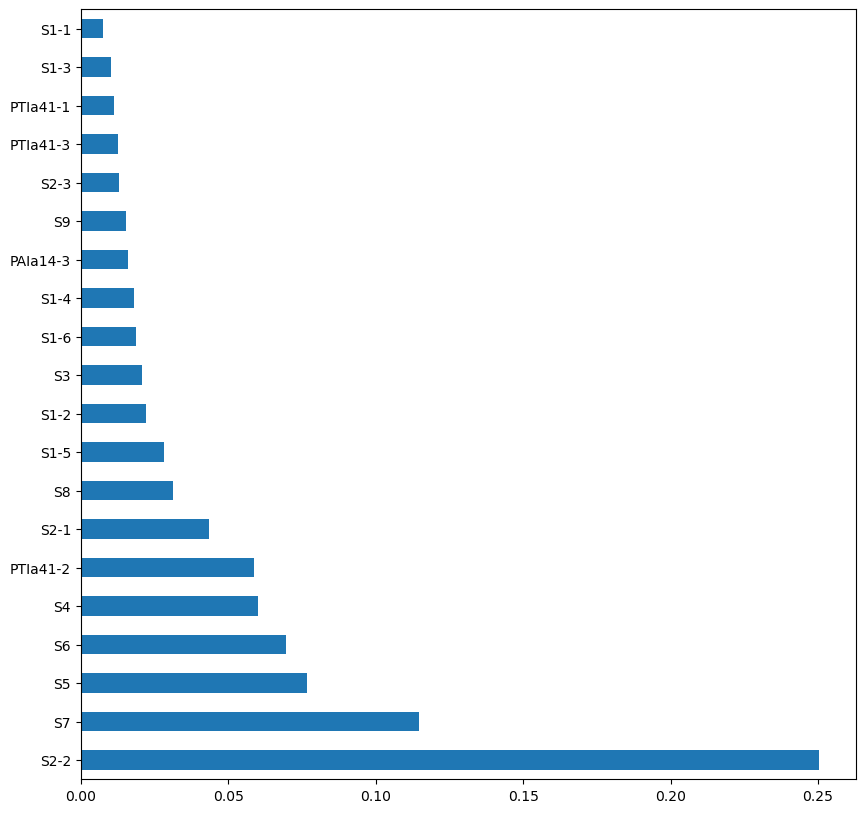

In [15]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import tree

y = data.label
X = data.drop('label', axis=1).drop('account', axis=1).drop('SW', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

normalizer = preprocessing.MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

model = tree.DecisionTreeClassifier(random_state=9,
                                    criterion='entropy',
                                    splitter='best')
model.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.savefig('importance_DT')

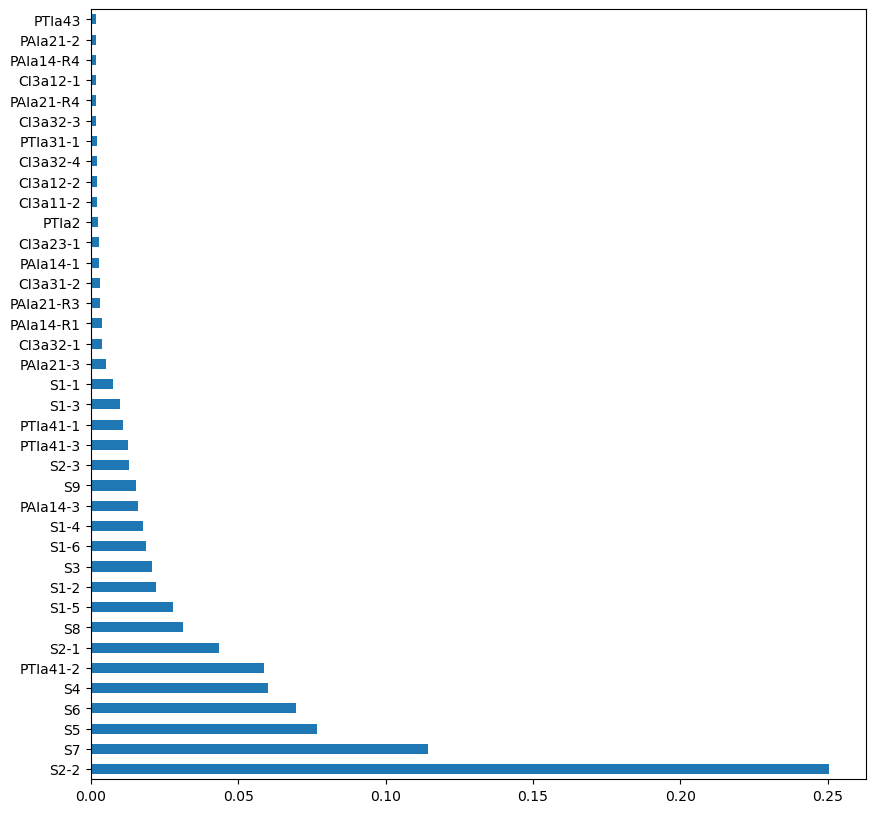

In [17]:
plt.figure(figsize=(10, 10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(38).plot(kind='barh')
plt.savefig('importance_DT')

In [18]:
# Get the names of the top 38 features
top_38_features = X.columns[model.feature_importances_.argsort()[-38:][::-1]]

print(top_38_features.tolist())

['S2-2', 'S7', 'S5', 'S6', 'S4', 'PTIa41-2', 'S2-1', 'S8', 'S1-5', 'S1-2', 'S3', 'S1-6', 'S1-4', 'PAIa14-3', 'S9', 'S2-3', 'PTIa41-3', 'PTIa41-1', 'S1-3', 'S1-1', 'PAIa21-3', 'CI3a32-1', 'PAIa14-R1', 'PAIa21-R3', 'CI3a31-2', 'PAIa14-1', 'CI3a23-1', 'PTIa2', 'CI3a11-2', 'CI3a12-2', 'CI3a32-4', 'PTIa31-1', 'CI3a32-3', 'PAIa21-R4', 'CI3a12-1', 'PAIa14-R4', 'PAIa21-2', 'PTIa43']


In [11]:
selected_cols = ['PAIa11-2', 'PAIa12', 'PAIa13', 'PAIa14-1', 'PAIa14-2', 'PAIa14-3',
       'PAIa14-4', 'PAIa14-R1', 'PAIa14-R2', 'S1-1', 'S1-2', 'S1-3', 'S1-4',
       'S1-5', 'S1-6', 'S2-1', 'S2-2', 'S2-3', 'S3', 'PAIa17-1', 'PAIa17-2',
       'PAIa17-3', 'PAIa17-R1', 'PAIa17-R2', 'S6', 'S7', 'S8', 'S9', 'PDIa1-3',
       'PTIa21', 'PTIa41-1', 'PTIa41-2', 'S4', 'S5', 'CI3a11-2', 'CI3a21-1',
       'CI3a23-1', 'CI3a23-2']

In [23]:
set(top_38_features.tolist()) - set(selected_cols)

{'CI3a12-1',
 'CI3a12-2',
 'CI3a31-2',
 'CI3a32-1',
 'CI3a32-3',
 'CI3a32-4',
 'PAIa14-R4',
 'PAIa21-2',
 'PAIa21-3',
 'PAIa21-R3',
 'PAIa21-R4',
 'PTIa2',
 'PTIa31-1',
 'PTIa41-3',
 'PTIa43'}

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'figsize'

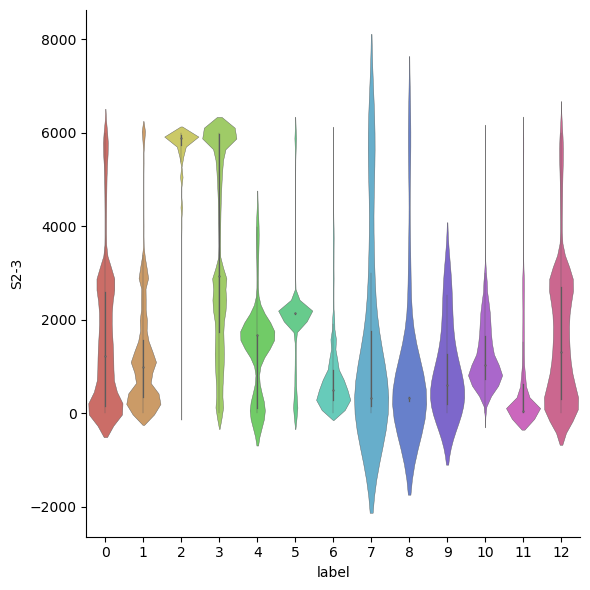

In [25]:
data = pd.read_csv('/kaggle/input/babd13/BABD-13.csv')
ax = sn.catplot(x="label", y="S2-3", data=data,  # PAIa21-1 PDIa1-2 PTIa41-2 CI3a32-2 S2-2 S2-3
                 kind='violin', 
                 linewidth=0.3,
                 width=0.9,     
                 height=6, palette='hls',
                 scale='width',   
                 gridsize=30,  
                 inner='box',
                 split=True
            )
plt.savefig('test', dpi=500, figsize=(10, 10))

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
y = data.label
X = data.drop('label', axis=1).drop('account', axis=1).drop('SW', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

normalizer = preprocessing.MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

select = SelectKBest(score_func=chi2, k=50)
fit = select.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(38, 'Score'))


         Specs         Score
139       S2-2  71014.271377
137       S1-6  59302.196199
140       S2-3  52660.917002
133       S1-2  44381.492542
138       S2-1  37908.714107
141         S3  26344.574199
132       S1-1  26306.212464
134       S1-3  26306.212464
136       S1-5  26306.212464
135       S1-4  23606.111431
26    PAIa21-1  15249.984795
30   PAIa21-R1  15160.351744
28    PAIa21-3   9169.042593
32   PAIa21-R3   8654.513876
61    PTIa41-2   8574.918151
18   PAIa16-R1   8461.417918
16    PAIa16-1   8429.708744
17    PAIa16-2   7376.237532
36   PAIa22-R1   6806.299477
34    PAIa22-1   6772.396373
19   PAIa16-R2   6556.230203
27    PAIa21-2   6048.064851
31   PAIa21-R2   5982.445131
35    PAIa22-2   5964.686291
144         S6   5482.497507
37   PAIa22-R2   5355.928882
62    PTIa41-3   4477.560796
143         S5   4167.612438
63      PTIa42   3208.906051
29    PAIa21-4   3135.445231
33   PAIa21-R4   3073.310800
52       PTIa1   2700.544333
54      PTIa21   2636.499751
64      PTIa43

In [17]:
top_38 = list(featureScores.sort_values('Score')['Specs'].iloc[:38])

In [19]:
top_38

['CI4a41',
 'CI4a42-1',
 'CI4a31',
 'CI4a32-1',
 'CI4a42-2',
 'CI1a2',
 'CI4a32-2',
 'PAIa12',
 'PDIa13-R',
 'PDIa13',
 'PDIa12-R',
 'PDIa12',
 'CI4a43',
 'CI3a32-1',
 'CI2a32-3',
 'CI2a32-1',
 'CI3a31-1',
 'CI4a33',
 'PAIa17-R2',
 'PAIa15-R2',
 'PAIa13',
 'CI2a31-1',
 'CI3a12-1',
 'CI2a33-2',
 'CI3a21-3',
 'CI3a21-2',
 'CI2a33-1',
 'CI1a1-2',
 'PAIa14-4',
 'CI1a1-1',
 'PAIa14-R2',
 'PAIa14-2',
 'CI3a11-1',
 'PAIa17-2',
 'PAIa15-2',
 'PAIa17-3',
 'PAIa17-R1',
 'PAIa17-1']

In [18]:
set(selected_cols) - set(top_38)

{'CI3a11-2',
 'CI3a21-1',
 'CI3a23-1',
 'CI3a23-2',
 'PAIa11-2',
 'PAIa14-1',
 'PAIa14-3',
 'PAIa14-R1',
 'PDIa1-3',
 'PTIa21',
 'PTIa41-1',
 'PTIa41-2',
 'S1-1',
 'S1-2',
 'S1-3',
 'S1-4',
 'S1-5',
 'S1-6',
 'S2-1',
 'S2-2',
 'S2-3',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9'}

New

In [4]:
correlation_matrix = df.corr()

/tmp/ipykernel_32/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [5]:
threshold = 0.9
high_correlation_features = []

high_correlation_features = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            if feature1 not in high_correlation_features:
                high_correlation_features[feature1] = []
            if feature2 not in high_correlation_features:
                high_correlation_features[feature2] = []
            high_correlation_features[feature1].append(feature2)
            high_correlation_features[feature2].append(feature1)

print("Features Highly Correlated with Each Other:")
# for feature, correlated_features in high_correlation_features.items():
#     print(f"{feature}: {', '.join(correlated_features)}")

correlated_feature_set = list(set(high_correlation_features.keys()))
len(correlated_feature_set)

Features Highly Correlated with Each Other:


105

In [8]:
data=pd.read_csv('/kaggle/input/babd13/BABD-13.csv')

In [9]:
df = data.copy()

In [10]:
df = df.dropna()

In [11]:
lab=LabelEncoder()
df['label']=lab.fit_transform(df['label'])
df['SW']=lab.fit_transform(df['SW'])


In [12]:
df = data.drop('SW', axis=1)

In [13]:
anomaly_labels= [0, 2, 6, 7, 8, 9]

In [14]:
df['label'] = df['label'].apply(lambda x: 1 if x in anomaly_labels else 0)

In [18]:
column_x = ['PAIa11-1', 'PAIa11-2', 'PAIa12', 'PAIa13', 'PAIa14-1', 'PAIa14-2', 'PAIa14-3', 'PAIa14-4', 'PAIa14-R1', 'PAIa14-R2', 'PAIa14-R3', 'PAIa14-R4', 'PAIa15-1', 'PAIa15-2', 'PAIa15-R1', 'PAIa15-R2', 'PAIa16-1', 'PAIa16-2', 'PAIa16-R1', 'PAIa16-R2', 'PAIa17-1', 'PAIa17-2', 'PAIa17-3', 'PAIa17-R1', 'PAIa17-R2', 'PAIa17-R3', 'PAIa21-1', 'PAIa21-2', 'PAIa21-3', 'PAIa21-4', 'PAIa21-R1', 'PAIa21-R2', 'PAIa21-R3', 'PAIa21-R4', 'PAIa22-1', 'PAIa22-2', 'PAIa22-R1', 'PAIa22-R2', 'PDIa1-1', 'PDIa1-2', 'PDIa1-3', 'PDIa1-R1', 'PDIa1-R2', 'PDIa1-R3', 'PDIa11-1', 'PDIa11-2', 'PDIa11-R1', 'PDIa11-R2', 'PDIa12', 'PDIa12-R', 'PDIa13', 'PDIa13-R', 'PTIa1', 'PTIa2', 'PTIa21', 'PTIa31-1', 'PTIa31-2', 'PTIa31-3', 'PTIa32', 'PTIa33', 'PTIa41-1', 'PTIa41-2', 'PTIa41-3', 'PTIa42', 'PTIa43', 'CI1a1-1', 'CI1a1-2', 'CI1a2', 'CI2a11-1', 'CI2a11-2', 'CI2a12-1', 'CI2a12-2', 'CI2a12-3', 'CI2a12-4', 'CI2a21-1', 'CI2a21-2', 'CI2a22-1', 'CI2a22-2', 'CI2a22-3', 'CI2a22-4', 'CI2a23-1', 'CI2a23-2', 'CI2a31-1', 'CI2a31-2', 'CI2a32-1', 'CI2a32-2', 'CI2a32-3', 'CI2a32-4', 'CI2a33-1', 'CI2a33-2', 'CI3a11-1', 'CI3a11-2', 'CI3a12-1', 'CI3a12-2', 'CI3a12-3', 'CI3a12-4', 'CI3a21-1', 'CI3a21-2', 'CI3a21-3', 'CI3a22-1', 'CI3a22-2', 'CI3a22-3', 'CI3a22-4', 'CI3a22-5', 'CI3a22-6', 'CI3a23-1', 'CI3a23-2', 'CI3a23-3', 'CI3a31-1', 'CI3a31-2', 'CI3a32-1', 'CI3a32-2', 'CI3a32-3', 'CI3a32-4', 'CI3a33-1', 'CI3a33-2', 'CI4a11', 'CI4a12-1', 'CI4a12-2', 'CI4a13', 'CI4a21', 'CI4a22-1', 'CI4a22-2', 'CI4a23', 'CI4a31', 'CI4a32-1', 'CI4a32-2', 'CI4a33', 'CI4a41', 'CI4a42-1', 'CI4a42-2', 'CI4a43', 'S1-1', 'S1-2', 'S1-3', 'S1-4', 'S1-5', 'S1-6', 'S2-1', 'S2-2', 'S2-3', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
column_y = ['label']

In [41]:
df1 = df.copy()

In [19]:
correlation_matrix = df1[column_x].corr()

In [52]:
threshold = 0.5
high_correlation_features = []

high_correlation_features = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            if feature1 not in high_correlation_features:
                high_correlation_features[feature1] = []
            if feature2 not in high_correlation_features:
                high_correlation_features[feature2] = []
            high_correlation_features[feature1].append(feature2)
            high_correlation_features[feature2].append(feature1)

print("Features Highly Correlated with Each Other:")
# for feature, correlated_features in high_correlation_features.items():
#     print(f"{feature}: {', '.join(correlated_features)}")

correlated_feature_set = list(set(high_correlation_features.keys()))
len(correlated_feature_set)

Features Highly Correlated with Each Other:


144

In [21]:
from sklearn.decomposition import PCA

In [57]:
df11 = df1[column_x].copy()

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df11 = scaler.fit_transform(df11)

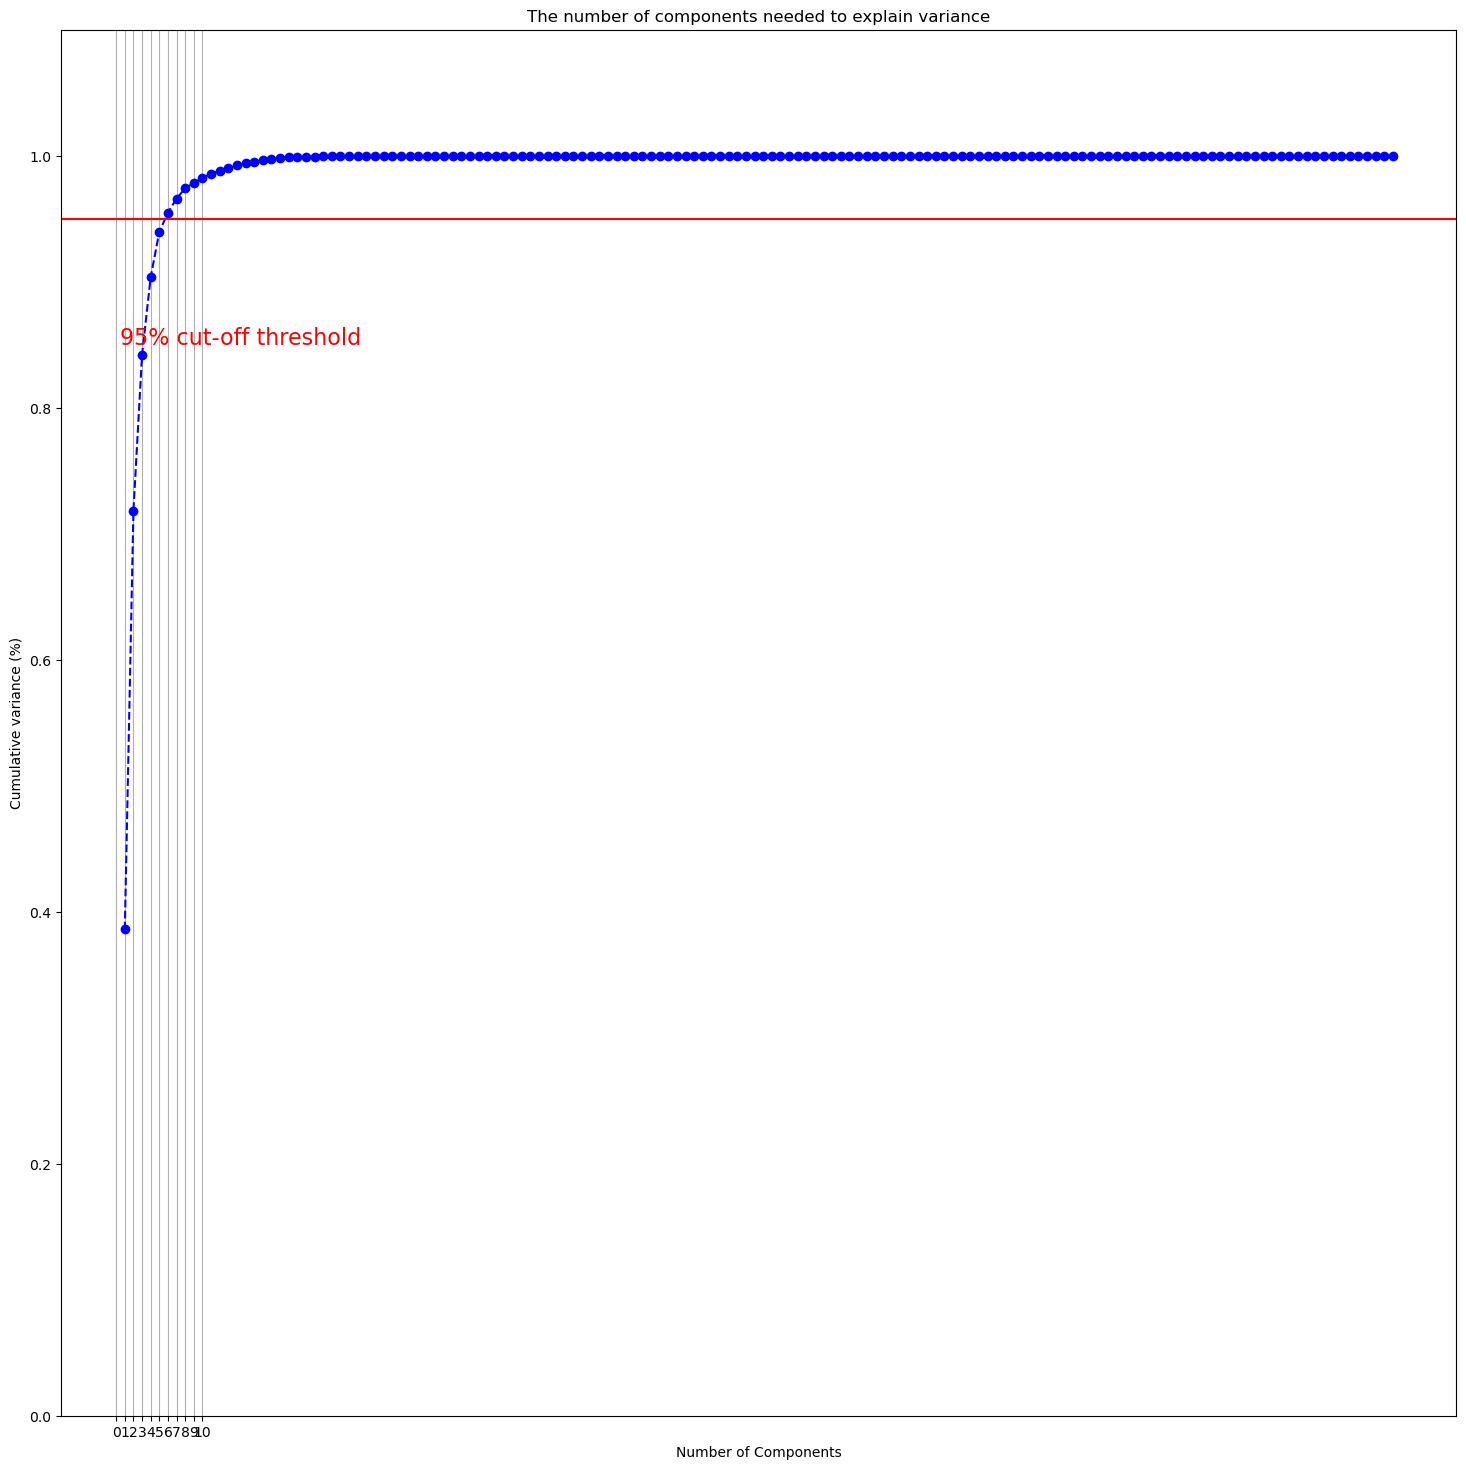

In [59]:
pca = PCA().fit(df11)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,18)

fig, ax = plt.subplots()
xi = np.arange(1, 149, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 148, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [63]:
n_com = 7

In [ ]:
pca = PCA().fit(df11)

In [61]:
df1_scal = df1[column_x]

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scal = scaler.fit_transform(df1_scal)

In [64]:
pca = PCA(n_components=n_com)
pca_result = pca.fit_transform(df1_scal)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_com)])

In [71]:
pca_df_col = pca_df.columns

In [72]:
final_df = pd.concat([df1, pca_df], axis=1)

In [67]:
final_df.head()

,label,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1,1.165394,1.098472,0.661713,1.044058,0.176012,-0.291038,1.243135
1,1,0.888710,1.593928,-0.800541,1.093817,0.094615,0.012228,0.656143
2,1,1.079984,1.338231,-0.004695,1.079899,-0.077307,0.190264,1.085070
3,1,0.233917,1.469140,-0.402601,1.328810,-0.042044,-0.523136,0.330513
4,1,-1.374676,0.427584,-0.053829,-0.037537,-0.229357,-0.074707,0.018731


In [79]:
y1 = final_df.label
X1 = final_df.drop('label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=9, stratify=y1)

In [82]:
X_train1, X_test1, y_train1, y_test1 = X_train.iloc[:, 149:157] , X_test.iloc[:, 149:157], y_train, y_test

In [89]:
X_train2, X_test2, y_train2, y_test2 = X_train.iloc[:, 1:149] , X_test.iloc[:, 1:149], y_train, y_test

In [90]:
X_train2

,PAIa11-1,PAIa11-2,PAIa12,PAIa13,PAIa14-1,PAIa14-2,PAIa14-3,PAIa14-4,PAIa14-R1,PAIa14-R2,...,S2-1,S2-2,S2-3,S3,S4,S5,S6,S7,S8,S9
89862,0.001500,0.001500,0.000000,1.0,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,...,1145,1195,2340,-0.264709,6.664445e-07,2.001134,5,0.500000,0.000313,0.000333
201028,3.524393,3.524393,0.000000,1.0,0.285798,2.004863,0.285798,2.004863,0.285798,2.004863,...,3,2891,2892,-0.318054,2.261802e-03,3.751756,5,0.334099,0.001543,0.000333
254759,0.000249,0.000249,0.000000,1.0,0.000249,0.000249,0.000249,0.000249,0.000249,0.000249,...,1312,1312,2624,-0.258215,4.120849e-04,2.538174,5,0.334294,0.000084,0.000479
12104,0.040202,0.040202,0.000000,1.0,0.040202,0.040202,0.040202,0.040202,0.040202,0.040202,...,955,955,1910,-0.163063,5.415528e-03,2.327713,6,0.340000,0.000212,0.000439
134709,0.000005,0.000005,0.000000,1.0,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,2998,2998,5996,-0.332889,6.662224e-04,2.001332,5,0.333445,0.000111,0.000666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444944,0.000888,0.000888,0.000000,1.0,0.000888,0.000888,0.000888,0.000888,0.000888,0.000888,...,138,62,200,-0.204714,1.290126e-03,4.039322,7,0.275120,0.000463,0.000333
106951,0.007347,0.007347,0.000000,1.0,0.007347,0.007347,0.007347,0.007347,0.007347,0.007347,...,2952,2952,5904,-0.329580,6.595579e-04,2.012447,5,0.333483,0.000090,0.000661
272133,0.003341,0.003341,0.000000,1.0,0.001567,0.001774,0.001567,0.001774,0.001567,0.001774,...,1240,608,1848,-0.261580,2.714651e-04,2.317823,5,0.334245,0.000372,0.000339
120360,0.576739,0.576739,0.000000,1.0,0.056643,0.293350,0.056643,0.293350,0.283388,0.293350,...,2574,2574,5148,-0.301044,1.502277e-03,2.116515,5,0.334446,0.000107,0.000619


In [87]:
knn = KNeighborsClassifier(algorithm='kd_tree',
                                     weights='distance',
                                     n_jobs=-1)
knn.fit(X_train1, y_train1)
y_pred_knn1 = knn.predict(X_test1)
a1 = accuracy_score(y_test1, y_pred_knn1)
print("KNN: " + str(a1))

KNN: 0.936947278521117


In [91]:
knn = KNeighborsClassifier(algorithm='kd_tree',
                                     weights='distance',
                                     n_jobs=-1)
knn.fit(X_train2, y_train2)
y_pred_knn2 = knn.predict(X_test2)
a2 = accuracy_score(y_test2, y_pred_knn2)
print("KNN: " + str(a2))

KNN: 0.9465989549374156


In [94]:
dt = DecisionTreeClassifier(
                                 criterion='entropy',
                                 splitter='best')
dt = dt.fit(X_train1, y_train1)
y_pred_dt1 = dt.predict(X_test1)
a1 = accuracy_score(y_true=y_test1, y_pred=y_pred_dt1)
print("DT: " + str(a1))

DT: 0.9215192895778425


In [95]:
dt = DecisionTreeClassifier(
                                 criterion='entropy',
                                 splitter='best')
dt = dt.fit(X_train2, y_train2)
y_pred_dt2 = dt.predict(X_test2)
a2 = accuracy_score(y_true=y_test2, y_pred=y_pred_dt2)
print("DT: " + str(a2))

DT: 0.9632024097049398


In [96]:
rfc = RandomForestClassifier(random_state=9,
                             n_estimators=200,
                             n_jobs=-1)
rfc = rfc.fit(X_train1, y_train1)
y_pred_rf1 = rfc.predict(X_test1)
a = accuracy_score(y_true=y_test1, y_pred=y_pred_rf1)
print("RF: " + str(a))

RF: 0.9445694397252349


In [97]:
rfc = RandomForestClassifier(random_state=9,
                             n_estimators=200,
                             n_jobs=-1)
rfc = rfc.fit(X_train2, y_train2)
y_pred_rf2 = rfc.predict(X_test2)
a = accuracy_score(y_true=y_test2, y_pred=y_pred_rf2)
print("RF: " + str(a))

RF: 0.9746081015308605


In [98]:
mlp = MLPClassifier(random_state=9,
                    max_iter=1000,
                    solver='adam',
                    hidden_layer_sizes=(100, 100, 100))
mlp = mlp.fit(X_train1, y_train1)
y_pred_mlp1 = mlp.predict(X_test1)
a = accuracy_score(y_true=y_test1, y_pred=y_pred_mlp1)
print("MLP: " + str(a))

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP: 0.9450286060628323


In [99]:
mlp = MLPClassifier(random_state=9,
                    max_iter=1000,
                    solver='adam',
                    hidden_layer_sizes=(100, 100, 100))
mlp = mlp.fit(X_train2, y_train2)
y_pred_mlp2 = mlp.predict(X_test2)
a = accuracy_score(y_true=y_test2, y_pred=y_pred_mlp2)
print("MLP: " + str(a))

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP: 0.8868981477229941


In [100]:
xgb = model = XGBClassifier(objective='multi:softmax',
                            num_class=13,
                            eval_metric='mlogloss',
                            learning_rate=0.5,
                            use_label_encoder=False,
                            n_jobs=-1)
xgb = xgb.fit(X_train1, y_train1)
y_pred_xgb1 = xgb.predict(X_test1)
a = accuracy_score(y_true=y_test1, y_pred=y_pred_xgb1)
print("XGB: " + str(a))

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGB: 0.9283425013545407


In [93]:
xgb = model = XGBClassifier(objective='multi:softmax',
                            num_class=13,
                            eval_metric='mlogloss',
                            learning_rate=0.5,
                            use_label_encoder=False,
                            n_jobs=-1)
xgb = xgb.fit(X_train2, y_train2)
y_pred_xgb2 = xgb.predict(X_test2)
a = accuracy_score(y_true=y_test2, y_pred=y_pred_xgb2)
print("XGB: " + str(a))

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGB: 0.9768947498920959
